>> Amr Abdelaziz Attia Mohamed  7447

## Multiclass Classification with fashion MNIST

Improting the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

- Reading the dataset into train and test 

- Printing the count of train_images,train_labels,test_images,test_labels

In [2]:
# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Number of training images:", train_images.shape[0])
print("Number of training labels:", train_labels.shape[0])
print("Number of test images:", test_images.shape[0])
print("Number of test labels:", test_labels.shape[0])

Number of training images: 60000
Number of training labels: 60000
Number of test images: 10000
Number of test labels: 10000


- Normalize the data set (images)

- Visualize one image for each class with their labels

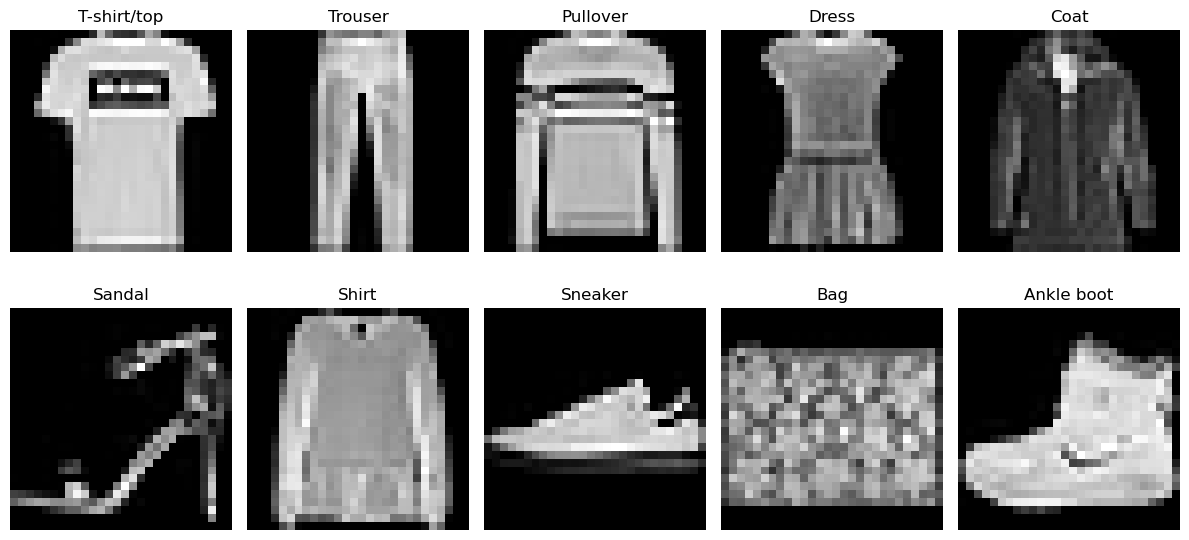

In [3]:
# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

# Visualize one image per class with their labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Find one example per class
unique_class_images = []
for class_idx in range(10):
    index = np.where(train_labels == class_idx)[0][0]  # Find the first occurrence of each class
    unique_class_images.append((train_images[index], class_names[class_idx]))

# Plot the images
plt.figure(figsize=(12, 6))
for i, (image, label) in enumerate(unique_class_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

- Flatten the images into 1D vector instead of 2D vector

- Divide the training data into train and validate sets with (80% train & 20% validate)

In [4]:
# Flatten images into 1D vectors and split training data into training/validation sets
train_images_flattened = train_images.reshape(-1, 28 * 28)
test_images_flattened = test_images.reshape(-1, 28 * 28)
X_train, X_val, y_train, y_val = train_test_split(train_images_flattened, train_labels, test_size=0.2, random_state=42)


- Building the model with 1 input layer (784 neuron) , 6 hidden layes with descending count of neurons & output layer with 10 neurons(count of classes)

- Make activation function 'relu' in all the hidden layers and 'softmax' in the output layer

- Compile the the model with:
    - Optimizer: adam 
    - Learning rate: 0.005
    - Loss: sparse_categorical_crossentropy
    - Metrics: accuracy

In [5]:
# Build the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    # Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    # Dropout(0.2),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    # Dropout(0.2),
    Dense(10, activation='softmax')
])
model.summary()
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               

- Define Early stopping function that monitor on 'val_loss'

- Make learning rate Scheduler if we reach near the local minimum

In [6]:
# Define callbacks: Early Stopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.5
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)


- Train the model with 50 epochs and may finish early due to early stopping

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), 
                    batch_size=32, callbacks=[early_stopping, lr_scheduler])


Epoch 1/50


1500/1500 [==============================] - 17s 9ms/step - loss: 0.5470 - accuracy: 0.8083 - val_loss: 0.4888 - val_accuracy: 0.8107 - lr: 5.0000e-04
Epoch 2/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4284 - accuracy: 0.8446 - val_loss: 0.5396 - val_accuracy: 0.8167 - lr: 5.0000e-04
Epoch 3/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3918 - accuracy: 0.8572 - val_loss: 0.4636 - val_accuracy: 0.8107 - lr: 5.0000e-04
Epoch 4/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3601 - accuracy: 0.8686 - val_loss: 0.3740 - val_accuracy: 0.8702 - lr: 5.0000e-04
Epoch 5/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3398 - accuracy: 0.8761 - val_loss: 0.3961 - val_accuracy: 0.8533 - lr: 5.0000e-04
Epoch 6/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3259 - accuracy: 0.8784 - val_loss: 0.3636 - val_accuracy: 0.8637 - lr: 5.0000e-04
Epoch 7/50
1500/1500 [====

- Evaluate the model on the test set (unseen data)

- Printing the accuracy of the model

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_flattened, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 [==============================] - 1s 2ms/step - loss: 0.3005 - accuracy: 0.9002
Test accuracy: 90.02%


- Printing the classification report of the model

- Plotting the confusion matrix of the model 

- Plotting the train VS validation accuracy

- Plotting the train VS validation loss

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.85      0.83      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.84      0.83      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.75      0.71      0.73      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



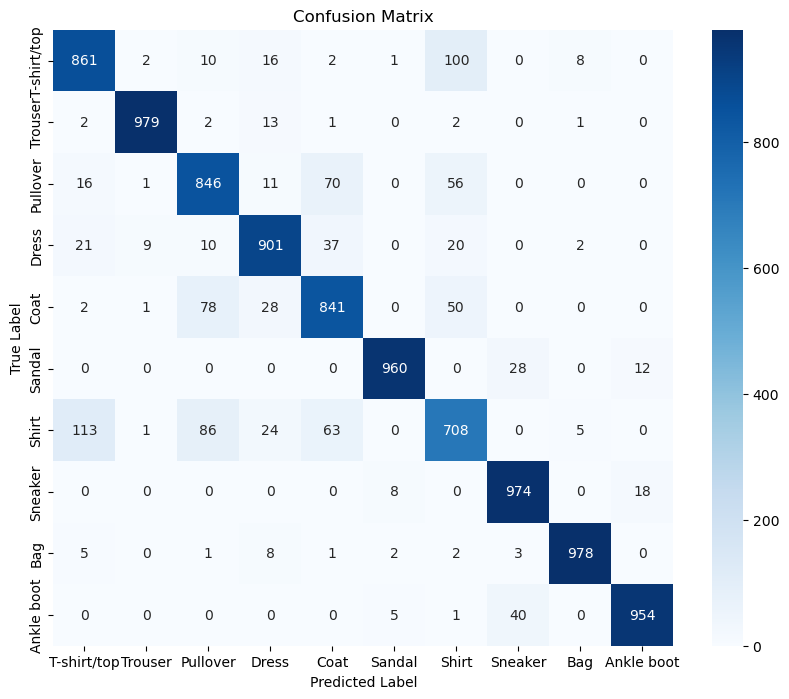

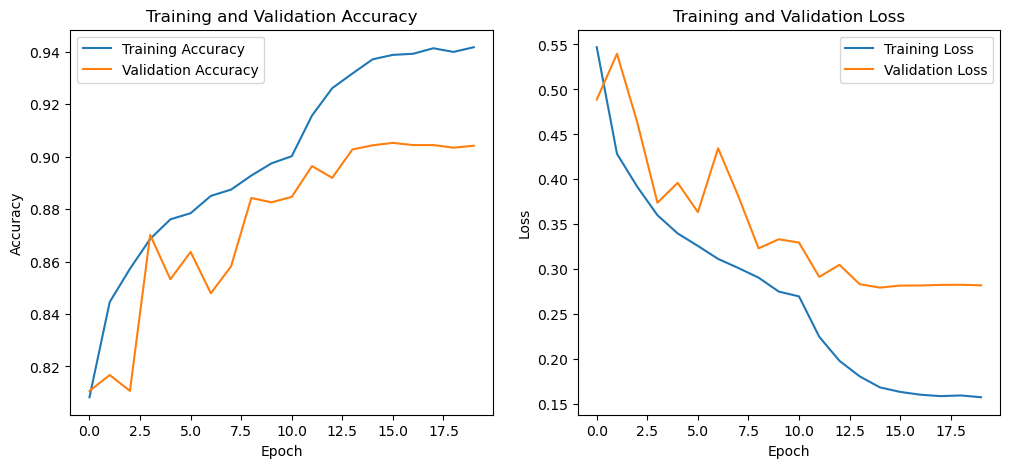

In [9]:

# Generate classification report and confusion matrix
predictions = model.predict(test_images_flattened)
y_pred = np.argmax(predictions, axis=1)
print(classification_report(test_labels, y_pred, target_names=class_names))

conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()